In [1]:
##IMPORTING LIBRARIEAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/VC/Downloads/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data=df.copy()
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
### data cleaning
to_drop=['RowNumber','CustomerId','Surname']
data=data.drop(to_drop,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
## we have to convert categorical varaible into numeric
Gender = pd.get_dummies(data['Gender'],drop_first=True)
Geo = pd.get_dummies(data['Geography'],drop_first=True)

In [8]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
data.drop(['Gender','Geography'],axis=1,inplace=True)

In [10]:
data = pd.concat([data,Gender,Geo],axis=1)

In [11]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [12]:
### min_max  technique for Balance and credit Score
data.Balance=(data.Balance-data.Balance.min())/(data.Balance.max()-data.Balance.min())

In [13]:
data.Balance

0       0.000000
1       0.334031
2       0.636357
3       0.000000
4       0.500246
          ...   
9995    0.000000
9996    0.228657
9997    0.000000
9998    0.299226
9999    0.518708
Name: Balance, Length: 10000, dtype: float64

In [14]:
data.CreditScore=(data.CreditScore-data.CreditScore.min())/(data.CreditScore.max()-data.CreditScore.min())
data.CreditScore

0       0.538
1       0.516
2       0.304
3       0.698
4       1.000
        ...  
9995    0.842
9996    0.332
9997    0.718
9998    0.844
9999    0.884
Name: CreditScore, Length: 10000, dtype: float64

In [19]:
#X = data[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary' ]] 
X=data.drop('Exited',axis=1)
y = data['Exited'] 

K Fold cross validation

In [51]:

from sklearn.model_selection import RepeatedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
kf

RepeatedKFold(n_repeats=1, n_splits=5, random_state=None)

In [31]:
for train_index, test_index in kf.split(data):
   # print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logmodel=LogisticRegression()
    logmodel.fit(X_train,y_train)
    predict = logmodel.predict(X_test)
    print(roc_auc_score(y_test,predict))

0.5
0.5
0.5730728055550808
0.5
0.5943516706228571


In [32]:
## predicting and  Training
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
logmodel.coef_

array([[-3.27119216e-01,  4.57872396e-02, -4.77532880e-02,
         3.44034772e-02, -8.68972732e-01, -3.45467387e-01,
        -7.45847711e-01, -1.15415590e-06, -5.98627822e-01,
         3.53122292e-01, -2.56752121e-01]])

In [35]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1557,321
1,36,86


In [37]:
### evalution , we have to chech f1  score and precision
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.70      0.21      0.33       407

    accuracy                           0.82      2000
   macro avg       0.77      0.59      0.61      2000
weighted avg       0.80      0.82      0.78      2000



In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5943516706228571

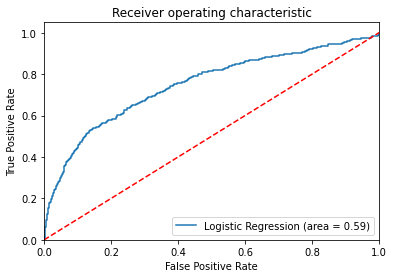

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [41]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5943516706228571

In [42]:
logmodel.predict_proba(X_test)

array([[0.86938563, 0.13061437],
       [0.92937646, 0.07062354],
       [0.38575671, 0.61424329],
       ...,
       [0.9656056 , 0.0343944 ],
       [0.81534224, 0.18465776],
       [0.71822184, 0.28177816]])

In [43]:
logmodel.predict_proba(X_test)[:,1]

array([0.13061437, 0.07062354, 0.61424329, ..., 0.0343944 , 0.18465776,
       0.28177816])

In [44]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False,  True, ..., False, False, False])

In [45]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([False, False,  True, ..., False, False,  True])

In [46]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1  

In [47]:
roc_auc_score(y_test,pred)

0.6840029551893959

In [53]:
print(confusion_matrix(y_test,pred))

[[1052  541]
 [ 119  288]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1593
           1       0.35      0.71      0.47       407

    accuracy                           0.67      2000
   macro avg       0.62      0.68      0.61      2000
weighted avg       0.79      0.67      0.70      2000



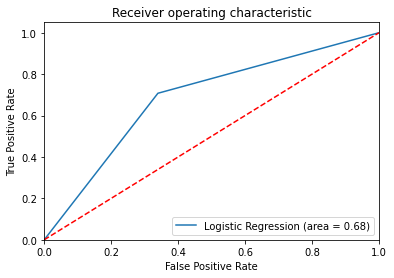

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()